# Set kernel to: `py-pythonEnv`
If this kernel is not available, see the Kernel Installation Instructions section located in at the bottom of this Notebook. 

# Data Science on the C3 AI Suite 
## C3DS - Metrics
#### For questions, comments, or concerns, please email the C3.ai Academy Team \< <training@c3.ai> \>, discuss with your Trainer, or leave your thoughts in the Google Forms at the end of this module.

## Table of Contents 

__[C3DS Metrics Review](#part1)__

* [Section 1 - Examples / Demo](#1)

    * [A. What are Metrics?](#1A)
    * [B. Understanding How to Access Our Data](#1B)
    * [C. Writing Simple Metrics](#1C)
    * [D. Create Metrics in the Chrome Developer Tool: Snippets Using Javascript](#1D)
    * [E. Writing Compound Metrics](#1E)
    * [F. Evaluating Metrics](#1F)
    * [G. Manipulating Time Series](#1G)
    * [H. Recap](#1H)
    
__[C3DS Writing Basic \& Advanced Metrics](#part2)__
    
* [Section 2 - Writing Basic \& Advanced Metrics Exercises](#2)    
    
    * [A. Writing Simple Metrics](#2A)
    * [B. Writing Compound Metrics](#2B)
    
[Appendix - Kernel Installation Instructions](#apdx)

# C3DS Metrics Review<a class="anchor" id="part1">

## Section 1 -  Examples / Demo  <a class="anchor" id="1">

### A. What are Metrics? <a class="anchor" id="1A">


C3 Metrics are data used to quickly and scalably aggregate and transform raw data into time series. Metrics can be implemented in the platform or defined on the fly in a Python notebook or environment console. The list of transforms that can be used to define metrics is described in the `ExpressionEngineFunction` type.

C3 Metrics can be of 2 different types:
- `SimpleMetric` defining a way to access data and transform it
- `CompoundMetric` to do mathematical operations on other metrics

Each new metric becomes a new building block for more complex metrics. In the future if that building block changes (to fix a bug for example), all the metrics that depend on it will be modified automatically. That behavior makes metrics easy to define, maintain and share across your organization.

Data Scientists use metrics to explore the data and create features.

> First, run the necessary `imports` below. Then, run the following to fetch all the **Simple Metrics** defined in our environment (there are a lot, so we've limited the display to five).

In [1]:
import matplotlib
%matplotlib inline

from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,6)

In [2]:
pd.DataFrame(c3.SimpleMetric.fetch(spec={'limit': 5}).objs.toJson())

type                                 name  \
0  SimpleMetric                      ActionQueueSize   
1  SimpleMetric            AmbientTemperatureMaximum   
2  SimpleMetric            AmbientTemperatureMinimum   
3  SimpleMetric  AmbientTemperatureStandardDeviation   
4  SimpleMetric                   AmbientTemperature   

                                                meta  \
0  {'type': 'Meta', 'tenantTagId': 21, 'tenant': ...   
1  {'type': 'Meta', 'tenantTagId': 21, 'tenant': ...   
2  {'type': 'Meta', 'tenantTagId': 21, 'tenant': ...   
3  {'type': 'Meta', 'tenantTagId': 21, 'tenant': ...   
4  {'type': 'Meta', 'tenantTagId': 21, 'tenant': ...   

                                                 id  version  \
0                                   ActionQueueSize        1   
1            AmbientTemperatureMaximum_WeatherAware        1   
2            AmbientTemperatureMinimum_WeatherAware        1   
3  AmbientTemperatureStandardDeviation_WeatherAware        1   
4                   AmbientTemperature_WeatherAware        1   

                                            srcType  \
0  {'type': 'TypeRef', 'typeName': 'VanityUrlStat'}   
1   {'type': 'TypeRef', 'typeName': 'WeatherAware'}   
2   {'type': 'TypeRef', 'typeName': 'WeatherAware'}   
3   {'type': 'TypeRef', 'typeName': 'WeatherAware'}   
4   {'type': 'TypeRef', 'typeName': 'WeatherAware'}   

                                          actionDecl  \
0  {'type': 'ActionMetricDecl', 'action': 'getQue...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                           unit  \
0                                           NaN   
1  {'type': 'Unit', 'id': 'degrees_fahrenheit'}   
2  {'type': 'Unit', 'id': 'degrees_fahrenheit'}   
3  {'type': 'Unit', 'id': 'degrees_fahrenheit'}   
4  {'type': 'Unit', 'id': 'degrees_fahrenheit'}   

                                 expression            path  
0                                       NaN             NaN  
1     max(max(normalized.data.temperature))  weatherStation  
2     min(min(normalized.data.temperature))  weatherStation  
3  avg(stddev(normalized.data.temperature))  weatherStation  
4     avg(avg(normalized.data.temperature))  weatherStation

### B. Understanding How to Access Our Data <a class="anchor" id="1B">


Writing C3 Metrics requires an understanding of the Data Model we are working with. It is important to know which type contains the data, which type we want our simple metrics to be defined on, and how to traverse the relationships between types in order to get from one to the other. 

One way to easily explore our data model and relationship between types is through the C3 Console. 

> Complete the cell below with the name of the type that contains the data for our SmartBulbs. Ask yourself, where is the data representing the series of measurements for smartbulbs, stored? If you're stuck, run `c3ShowType(SmartBulb)` to explore the data model by leveraging hyperlinks. 

In [7]:
?c3.SmartBulbMeasurementSeries.data

> Now, run `c3ShowType` on this type in the JS console. Then, click on the type that mixes in `TimeseriesDataPoint`.  

As you can see, this type contains a `data` field that is inherited from the `TimeseriesHeader` type that is mixed in, that references to the type in which our data is stored.

> In the cell below, explain in your own words what the use of this type is.

In [6]:
pd.DataFrame(c3.SmartBulb.listMetrics().toJson())

type                                name  \
0     SimpleMetric                       AverageLumens   
1     SimpleMetric                        AveragePower   
2     SimpleMetric                  AverageTemperature   
3     SimpleMetric                      AverageVoltage   
4     SimpleMetric              ConnectivityEventCount   
5   CompoundMetric               CumulativeSwitchCount   
6   CompoundMetric                           DayOfWeek   
7   CompoundMetric                           DayOfYear   
8   CompoundMetric                          DaysInYear   
9   CompoundMetric                   DurationOnInHours   
10    SimpleMetric                  FeatureCountSeries   
11  CompoundMetric                       HasEverFailed   
12  CompoundMetric                             Holiday   
13  CompoundMetric                           HourOfDay   
14  CompoundMetric                          HourOfWeek   
15  CompoundMetric                         IsDefective   
16    SimpleMetric                 LightningEventCount   
17  CompoundMetric                         MonthOfYear   
18  CompoundMetric                       NonWorkingDay   
19  CompoundMetric                        NumberOfDays   
20  CompoundMetric                       NumberOfHours   
21    SimpleMetric                    OutageEventCount   
22  CompoundMetric                       OutageWhileOn   
23  CompoundMetric                    PowerConsumption   
24  CompoundMetric                   ProminentFeatures   
25    SimpleMetric                           RiskScore   
26  CompoundMetric  StandardDeviationWattsPreviousWeek   
27    SimpleMetric                              Status   
28  CompoundMetric                         SwitchCount   
29  CompoundMetric             SwitchCountPreviousWeek   
30  CompoundMetric                   WillFailNextMonth   
31    SimpleMetric                                 m13   

                                           expression  \
0                    avg(avg(normalized.data.lumens))   
1                     avg(avg(normalized.data.power))   
2               avg(avg(normalized.data.temperature))   
3                   avg(avg(normalized.data.voltage))   
4                                                 NaN   
5                         rolling('SUM', SwitchCount)   
6                 timeComponent('DAYOFWEEK', start())   
7                 timeComponent('DAYOFYEAR', start())   
8   timeComponent('YEAR', start()) % 4 != 0 || (ti...   
9            rolling('SUM',sum(eval('HOUR', Status)))   
10                                                NaN   
11                 rolling('SUM',IsDefective) ? 1 : 0   
12                             holiday(identity(1.0))   
13                     timeComponent('HOUR', start())   
14                 ((DayOfWeek - 1) * 24) + HourOfDay   
15  sum(eval('HOUR', AverageLumens == 0 && Status ...   
16                                                NaN   
17                    timeComponent('MONTH', start())   
18  Holiday || timeComponent('DAYOFWEEK', start())...   
19               (end() - start()) / period(1, 'DAY')   
20              (end() - start()) / period(1, 'HOUR')   
21                                                NaN   
22  sum(eval('HOUR', OutageEventCount == 1 && Stat...   
23  rolling('SUM',sum(eval('HOUR', AveragePower)))...   
24         nMostProminentFeatures(AllNLFeaturesTS, N)   
25         identity(currentPrediction.prediction/365)   
26  eval('AVG', 'DAY', window('STDDEV', AveragePow...   
27                   avg(avg(normalized.data.status))   
28        sum(eval('HOUR', abs(rollingDiff(Status))))   
29                  window('SUM', SwitchCount, -7, 7)   
30              window('MAX', IsDefective, 0, 30) > 0   
31                                                NaN   

                                                 meta  \
0   {'type': 'Meta', 'tenantTagId': 21, 'tenant': ...   
1   {'type': 'Meta', 'tenantTagId': 21, 'tenant': ...   
2   {'type': 'Meta', 'tenantTagId': 21, 'tenan

> Now, click on the reference to the `SmartBulb` type.

**Congratulations!** You have successfully traversed from the type that contains your data, to the type on which you want to **define your metrics**. This process will be very useful when you are working with more complicated data models, and you are not sure how to define the path of your metrics in order to reach your data from your source type.

> Before finishing this part, run `c3Grid(SmartBulb.listMetrics())` in your JS Console (or `pd.DataFrame(c3.SmartBulb.listMetrics().toJson())` in Jupyter). This will list all the metrics that are available on the SmartBulb Type.

### C. Writing Simple Metrics <a class="anchor" id="1C">

In the C3 Fundamentals course you went through as part of your first C3 AI Suite Coursera Course, you defined metrics directly on the platform. These metrics were then saved as seed files.

Another very important way for Data Scientists to define metrics is **on-the-fly** in a Jupyter notebook. This allows Data Scientists to quickly test out prototyped metrics before deciding which metrics should be implemented in the platform. 

As we've discussed in the lectures, there are usually three data types that data scientsits want to create simple metrics on:

* Point-wise time series data (e.g., sensor data that has one point every second)
* Event-based time series data (e.g., anomaly event data that has a start timestamp and an end timestamp)
* Non time-related data (e.g., manufacturer of a lightbub, size of a house, gender of an employee)


In this part of the project, we will show examples of these three types of simple metrics.

> Note: A simple metric `id` should be `MetricName_SourceType` and the `name` should be `MetricName`. See cell below for more details.

#### Point-wise time series data

> In the cell below, we implemented our `Status` simple metric from the LightBulb Application in Python.

In [2]:
status_metric = c3.SimpleMetric(id = "Status_SmartBulb",
                                name = "Status",
                                path = "bulbMeasurements",
                                expression = "avg(avg(normalized.data.status))",
                                srcType = "SmartBulb")

> The cell below shows the code as it would appear had you written it in a JSON file.

In [3]:
status_metric.toJson()

{'type': 'SimpleMetric',
 'name': 'Status',
 'expression': 'avg(avg(normalized.data.status))',
 'id': 'Status_SmartBulb',
 'srcType': {'type': 'TypeRef', 'typeName': 'SmartBulb'},
 'path': 'bulbMeasurements'}

#### Event-based time series data

In the first Coursera course, we used the `PowerGridStatus` of a Building to show an example of an event-based time series data. We used **Time Series Declarations** to manipulate this event data into a simple metric.

Below is the code for this metric's definition in the `PowerGridStatus_Building.json` file that you implemented:

<img src='http://learnc3.ai/wp-content/uploads/2020/01/PowerGridStatusMetric.png' width="500"/>

> The cell below contains the code to create this metric **on the fly** in a Jupyter Notebook. Notice that in Python, you need to create the content of the `tsDecl` object seperately from the definition of `myPowerGridStatusMetic`, whereas this was done within the metric definition in the json file above.

In [4]:
tsDeclObject = c3.TSDecl(
    data = "gridStatusSet",
    value = "value",
    treatment = "PREVIOUS",
    start = "timestamp"
)

myPowerGridStatusMetric = c3.SimpleMetric(
    id = "PowerGridStatus_Building",
    name = "PowerGridStatus",
    srcType = "Building",
    tsDecl = tsDeclObject
)

## D. Create Metrics in the Chrome Developer Tool: Snippets Using Javascript <a class="anchor" id="1D">

In the console, go to Sources / Snippets / New Snippet, then:

1. Create a variable for simple metric using the `make()` function on the `SimpleMetric` type, containing the following parameters: `expression`, `id`, `name`, `path`, `srcType`, `type`.
2. Create another variable for metric evaluation using `evalMetricsWithMetadata()` function on the source type, including the following parameters: `expressions`, `ids`, `interval`, `start`, `type`, where the value of `ids` is a list of simplemetrics to be evaluated (i.e., the one you just created).
3. Plot the resulting timeseries using c3Viz(resulting_variable_of_evalMetricsWithMetadata)  
4. Run using command+return

>Note: `make()` has fields of `expression` \& `id`, where `evalMetricsWithMetadata()` has fields of `expressions` and `ids`; can you explain why?

<img src="http://learnc3.ai/wp-content/uploads/2020/05/C3DS_MetricSnippetsJSConsole.png" width="500" />

### E. Writing Compound Metrics <a class="anchor" id="1E">



Writing compound metrics is essential to Data Scientists, as it enables them to create complex metrics that will serve as features for their Machine Learning Models. 

It is essential to understand both the syntax around writing compound metrics, and also the logic behind each of the functions available in the `ExpressionEngineFunction` type.


> Go to your console, run `c3ShowType(ExpressionEngineFunction)`, and take a look at all the different methods. This will be a key resource for you in the rest of the project but also in your work as a Data Scientist in the future.

We will now show a few examples of compound metrics described in the slides implemented in Python. 

> **Note**: For a compound metric, the **name** and **id** need to match.

##### a. Expression using `window()`

> In the cell below, we defined the compound metric shown in the lecture that uses `window()` to compute the maximum `AveragePower` over the past 2 days.

In [5]:
myCompoundMetric = c3.CompoundMetric(id = "myCompoundMetric",
                                     name = "myCompoundMetric",
                                     expression = "window('MAX', AveragePower, -2, 2)")


##### b. Expressions using `rolling()`

> In the cell below, we defined the compound metric shown in the lecture that uses `rolling()` to compute the cumulative sum of the `AveragePower`.

In [6]:
myCompoundMetric = c3.CompoundMetric(id = "myCompoundMetric",
                                     name = "myCompoundMetric",
                                     expression = "rolling('SUM', AveragePower)")

##### c. Expressions using `eval()`

> In the cell below, we defined the compound metric shown in the lecture that uses `eval()` to correct the metric defined above with `rolling()` in order to force the start date of the evaluation.

In [2]:
myCompoundMetric = c3.CompoundMetric(id = "myCompoundMetric",
                            name = "myCompoundMetric",
                            expression = "eval('AVG', 'DAY', rolling('SUM', AveragePower), dateTime(1990-01-01))")

### F. Evaluating Metrics <a class="anchor" id="1F">

The easiest way to collect timeseries data from a C3 environment is to use the `evalMetrics` API on types where it is defined. This requires two steps. First, we define an `EvalMetricsSpec`. Second, we use this `EvalMetricsSpec` as as argument to `evalMetrics`.

> Note: Before we evaluate the Metrics defined above, we want to ensure data is properly loaded to our tag. Otherwise, our Metrics will not contain any useful information! To check this, uncomment the cell below and run it. If `SmartBulbMeasurement` data has been loaded, this cell will execute just file. On the other hand, if this cell fails or errors, we'll need to upload this data via Postman!
    
#### Defining an EvalMetricsSpec

`evalMetrics` takes an `EvalMetricsSpec` object as argument, where `EvalMetricsSpec` contains a 5 important fields:
* `expressions` : list of metrics to evaluate
* `ids` : list of ids of sources on which we want to evaluate given metrics 
* `start` : beginning of the slice of the series to query
* `end` : end of the slice of the series to query
* `interval` : granularity of timeseries


> Note: `ids` can be substituted by `filter` and `limit` in the `EvalMetricsSpec` when the `ids` list is too long or cumbersome to declare.

In the cell below, we wrote an `EvalMetricsSpec` that will serve to evaluate the `AverageLumens`, `Status`, `SwitchCountPreviousWeek`, `isDefective`, and `HasEverFailed` metrics between **January 1st, 2011** and **January 1st, 2016** on an **hourly** interval for **`SmartBulbs 1,2,3`**.


> We encourage you to run `c3ShowType(EvalMetricsSpec)` in your JS console to understand the input of metrics evaluation functions.

> Note: Keep in mind for later that these metrics were all defined on the platform and are present in json files in the seed folder in your package.

In [8]:
## Assert SmartBulbMeasurement data is loaded to your tag BEFORE defining & evaluating metrics!
assert (c3.SmartBulbMeasurement.fetchCount() != 0),'Assertion Failed: Please PUT data to your tag via Postman!'

In [3]:
mySpec1 = c3.EvalMetricsSpec(
        ids = ["SMBLB1","SMBLB2","SMBLB3"],
        expressions = ["AverageLumens", "Status", "SwitchCountPreviousWeek", "IsDefective", 
                       "DurationOnInHours","HasEverFailed"],
        start = "2011-01-01",
        end = "2016-01-01",
        interval = "DAY"
)

mySpec1.toJson()

{'type': 'EvalMetricsSpec',
 'start': '2011-01-01T00:00:00',
 'end': '2016-01-01T00:00:00',
 'timeZone': 'NONE',
 'interval': 'DAY',
 'cache': False,
 'ids': {'SMBLB1', 'SMBLB2', 'SMBLB3'},
 'expressions': {'AverageLumens',
  'DurationOnInHours',
  'HasEverFailed',
  'IsDefective',
  'Status',
  'SwitchCountPreviousWeek'},
 'continueOnError': False}

In [18]:
"""
mySpec1 = c3.EvalMetricSpec(
        id = ["SMBLB1"],
        expression = "Status",
        start = "2011-01-01",
        end = "2016-01-01",
        interval = "DAY"
)

mySpec1.toJson()
"""

{'type': 'EvalMetricSpec',
 'start': '2011-01-01T00:00:00',
 'end': '2016-01-01T00:00:00',
 'timeZone': 'NONE',
 'interval': 'DAY',
 'cache': False,
 'id': "['SMBLB1']",
 'expression': 'Status'}

> Below, we created a spec with the same `expressions`, `start`, `end`, and `inteval`, but instead of giving a list of `ids`, we used a `filter` to only select SmartBulbs that have a **LED** bulbType, and used `limit` to restrict the number of SmartBulbs to 20.

In [4]:
mySpec2 = c3.EvalMetricsSpec(
        expressions = ["AverageLumens", "Status", "SwitchCountPreviousWeek", "IsDefective", 
                       "DurationOnInHours","HasEverFailed"],
        start = "2011-01-01",
        end = "2016-01-01",
        interval = "DAY",
        filter = "startsWith(bulbType, 'LED')",
        limit = 20
)

Finally, we used the cell below to create a spec that will serve to evaluate the **myCompoundMetric** metric between **January 1st, 2011** and **January 1st, 2016** on an **hourly** interval for all SmartBulbs that have `ids` starting with a **SMBLB1**.

> Note: Keep in mind for later that this metric was defined **on the fly** in this Jupyter Notebook.

In [11]:
mySpec3 = c3.EvalMetricsSpec(
        expressions = ["myCompoundMetric"],
        start = "2011-01-01",
        end = "2016-01-01",
        interval = "DAY",
        filter = "startsWith(id, 'SMBLB1')"
)

#### Call `evalMetrics` or `evalMetricsWithMetadata`

Three APIs are available to evaluate metrics:
* `evalMetrics`: to evaluate metrics already defined (i.e. provisioned) in C3 AI Suite environment
* `evalMetricsWithMetadata`: to evaluate metrics defined on the fly or already in C3 AI Suite. If you do this, you will need to pass in a second argument to this function that will be a list of the metrics that do not yet exist in a C3 Database.
* `evalMetric`: only used by front end to retrieve data for 1 source, and 1 expression, it is not suitable for Data Science.

> In the cell below, we evaluated our `mySpec1` spec using `evalMetrics`.

>> We encourage you to run `c3ShowType(EvalMetricsResult)` in your JS console to understand the output of metrics evaluation functions.

In [19]:
myResult1 = c3.SmartBulb.evalMetric(spec=mySpec1)

In [20]:
myResult1Dict = myResult1.toJson()

In [22]:
#myResult1Dict

> If we want to evaluate the metrics we defined on the fly within the platform, which is the case for our `mySpec3` spec, we need to use `evalMetricsWithMetadata` as seen in the example below.

In [16]:
myResult3 = c3.SmartBulb.evalMetricsWithMetadata(spec=mySpec3, overrideMetrics=[myCompoundMetric])

In [17]:
myResult3.toJson()

{'type': 'EvalMetricsResult',
 'result': {'SMBLB12': {'myCompoundMetric': {'type': 'NormTimeseriesDouble',
    'm_start': '2011-01-01T00:00:00',
    'm_end': '2016-01-01T00:00:00',
    'm_data': [2.25,
     8.0,
     12.541666666666666,
     19.458333333333332,
     25.458333333333332,
     31.666666666666664,
     32.95833333333333,
     34.791666666666664,
     41.125,
     47.458333333333336,
     53.833333333333336,
     59.083333333333336,
     64.66666666666667,
     66.66666666666667,
     69.875,
     74.70833333333333,
     80.33333333333333,
     86.75,
     91.125,
     92.83333333333333,
     94.08333333333333,
     97.125,
     100.29166666666667,
     104.66666666666667,
     109.70833333333334,
     115.29166666666667,
     121.54166666666667,
     122.83333333333334,
     124.79166666666667,
     131.04166666666666,
     135.5,
     139.66666666666666,
     144.08333333333331,
     150.37499999999997,
     152.83333333333331,
     155.33333333333331,
     160.3333333333

### G. Manipulating Time Series<a class="anchor" id="1G">


Once we have defined and evaluated our metrics, there are two ways we usually want to visualize our time series:
* in a grid
* in a chart.

In this section, we will go how to manipulate our time series in order to visualize them as we please.

We will be leveraging the C3 type, Dataset, to convert between Pandas dataframes or Numpy arrays to a type that C3 can interpret. 

Feel free to c3ShowType(Dataset) for all the handy functions that will help you to convert between Pandas DataFrames, Numpy arrays, C3 Datasets, and C3 EvalMetricResults. 

In [18]:
# convert EvalMetricResult to a Dataset
ds = c3.Dataset.fromEvalMetricsResult(result = myResult1)

# convert Dataset to Pandas DataFrame
df = c3.Dataset.toPandas(dataset = ds)

#### Grid view

In [19]:
df.head(3)

AverageLumens  DurationOnInHours  HasEverFailed  \
SMBLB1_2011-01-01T00:00:00     150.000000                3.0            0.0   
SMBLB1_2011-01-02T00:00:00     416.625000               13.0            0.0   
SMBLB1_2011-01-03T00:00:00     333.266667               21.0            0.0   

                            IsDefective    Status  SwitchCountPreviousWeek  
SMBLB1_2011-01-01T00:00:00          0.0  0.150000                      0.0  
SMBLB1_2011-01-02T00:00:00          0.0  0.416667                      4.0  
SMBLB1_2011-01-03T00:00:00          0.0  0.333333                      8.0

In [20]:
df['source'] = df.index.str.split('_').str[0]
df['timestamp'] = pd.to_datetime(df.index.str.split('_').str[1],format="%Y-%m-%dT%H:%M:%S.%f")

In [21]:
df.head(3)

AverageLumens  DurationOnInHours  HasEverFailed  \
SMBLB1_2011-01-01T00:00:00     150.000000                3.0            0.0   
SMBLB1_2011-01-02T00:00:00     416.625000               13.0            0.0   
SMBLB1_2011-01-03T00:00:00     333.266667               21.0            0.0   

                            IsDefective    Status  SwitchCountPreviousWeek  \
SMBLB1_2011-01-01T00:00:00          0.0  0.150000                      0.0   
SMBLB1_2011-01-02T00:00:00          0.0  0.416667                      4.0   
SMBLB1_2011-01-03T00:00:00          0.0  0.333333                      8.0   

                            source  timestamp  
SMBLB1_2011-01-01T00:00:00  SMBLB1 2011-01-01  
SMBLB1_2011-01-02T00:00:00  SMBLB1 2011-01-02  
SMBLB1_2011-01-03T00:00:00  SMBLB1 2011-01-03

Let's put this all into a handy function that we'll use throughout the assignment:

In [22]:
def eval_metric_results_to_df(emr): 
    ds = c3.Dataset.fromEvalMetricsResult(result = emr)
    df = c3.Dataset.toPandas(dataset = ds)
    df['source'] = df.index.str.split('_').str[0]
    df['timestamp'] = pd.to_datetime(df.index.str.split('_').str[1],format="%Y-%m-%dT%H:%M:%S.%f")
    return df

#### Chart View

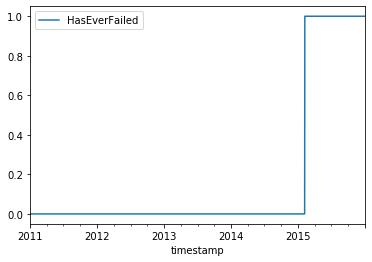

In [23]:
df[df['source']=='SMBLB1'].plot(x='timestamp',y='HasEverFailed')

#### Chrome JS Console
At times, you may want to visualize metrics directly in the Console. Reminder that the syntax would be the following: 


```js
var m1 = SimpleMetric.make({
 'expression': 'avg(avg(normalized.data.temperature))',
 'id': 'm1_SmartBulb',
 'name': 'm1',
 'path': 'bulbMeasurements',
 'srcType': 'SmartBulb',
 'type': 'SimpleMetric'
})

var res = SmartBulb.evalMetricsWithMetadata({
  end: '2011-03-01',
  expressions: ['m1'],
  ids: ['SMBLB1'],
  interval: 'DAY',
  start: '2011-01-01',
  type: 'EvalMetricsSpec'
}, [m1])

c3Viz(res)```

### H. Recap <a class="anchor" id="1H">

Let's take a step back and recap the important steps we went over during metric creation:

1. Understand your data model to know the type that contains the data, the type on which the metric is going to be created, and how to get from one to the other
2. Determine what kind of simple metric we will write based on the timed data we have
3. Define the simple metric
4. Use this simple metric and the functions available in the Expression Engine to write a compound metric that can serve as a feature in the Machine Learning Model
5. Write an EvalMetric spec 
6. Evaluate the metric
7. Convert your EvalMetrics result to a time series object
8. Visualize your metric in a grid or a chart

# C3DS Writing Basic \& Advacned Metrics <a class="anchor" id="part2">

## Section 2 - Writing Basic \& Advanced Metrics Exercises  <a class="anchor" id="part2">

### A. Writing Simple Metrics <a class="anchor" id="2A">


In this section, you will be given the skeleton to write, evaluate, and plot simple metrics. **Your task** is to complete the parts that are left as **"???"** in order for your output to match the plot of the correct answer we displayed for you.

##### Simple Metric 1

> Define a metric that returns the **average** value of, across **time and space**, for temperature, on **normalized** data (Note: it is fair to assume were using normalize data, unless otherwise stated). 

> Evaluate the metric with **interval = "DAY"**

Answer the following: 
> Does the result make sense? Pay attention to the values. We will do comparisons later.

Text(0.5, 1.0, 'My Answer')

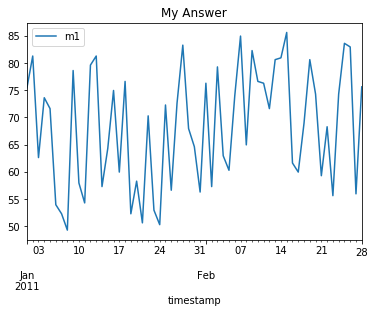

In [24]:
m1 = c3.SimpleMetric(
    id = "m1_SmartBulb",
    name = "m1",
    srcType = "SmartBulb",
    path = "bulbMeasurements",
    expression = "avg(avg(normalized.data.temperature))"
)

spec1 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m1"],
    start = "2011-01-01",
    end = "2011-03-01",
    interval = "DAY"
)

result1 = c3.SmartBulb.evalMetricsWithMetadata(spec=spec1,  overrideMetrics=[m1])

df = eval_metric_results_to_df(result1)
df[df['source']=='SMBLB1'].plot(x='timestamp',y='m1')
plt.title("My Answer")

<img src="http://learnc3.ai/wp-content/uploads/2020/01/SimpleMetric1.png" width="500"/>

Data Scientists also often define metrics in the JS Console. Therefore, we ask that you now adapt your code to re-implement the metric above in your JS console in a snippet, evaluate it with the same spec, and make sure that you obtain the same plot when you display it.  

> Hint: You will need to use `SimpleMetric.make()`, and `c3Viz()` amongst other functions.

The plot should look like this:
<img src="http://learnc3.ai/wp-content/uploads/2020/03/SimpleMetricM1JS.png" width="650"/>

##### Simple Metric 2

> Define a metric that returns the **average** value of **temperature** across time and **no aggregation** across space

> Evaluate the metric with **interval = "DAY"**

Answer the following:

> Comparing this result with the result of **simple metric 1**, can you explain why values stay the same with/without aggregation across space?

Text(0.5, 1.0, 'My Answer')

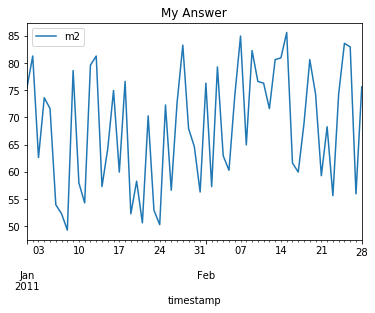

In [27]:
m2 = c3.SimpleMetric(
    id = "m2_SmartBulb",
    name = "m2",
    srcType = "SmartBulb",
    path = "bulbMeasurements",
    expression = "avg(normalized.data.temperature)"
)

spec2 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m2"],
    start = "2011-01-01",
    end = "2011-03-01",
    interval = "DAY"
)

result2 = c3.SmartBulb.evalMetricsWithMetadata(spec=spec2, overrideMetrics=[m2])

df = eval_metric_results_to_df(result2)
df[df['source']=='SMBLB1'].plot(x='timestamp',y='m2')
plt.title("My Answer")

<img src="http://learnc3.ai/wp-content/uploads/2020/01/SimpleMetric2.png" width="500"/>

##### Simple Metric 3

> Define a metric that returns the **average** value of the **temperature** across time and the **average** across space

> Evaluate the metric with **interval = "HOUR"**

Answer the following:

> Comparing this result with the result of **simple metric 1**, do you understand why one looks spiky and one looks smoothed?

Text(0.5, 1.0, 'My Answer')

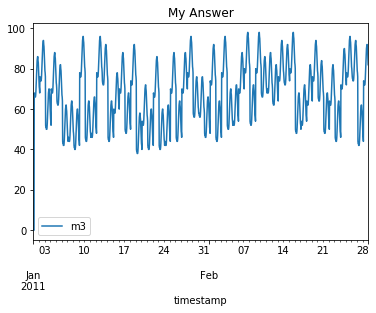

In [28]:
m3 = c3.SimpleMetric(
    id = "m3_SmartBulb",
    name = "m3",
    srcType = "SmartBulb",
    path = "bulbMeasurements",
    expression = "avg(avg(normalized.data.temperature))"
)

spec3 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m3"],
    start = "2011-01-01",
    end = "2011-03-01",
    interval = "HOUR"
)

result3 = c3.SmartBulb.evalMetricsWithMetadata(spec=spec3, overrideMetrics=[m3])

df = eval_metric_results_to_df(result3)
df[df['source']=='SMBLB1'].plot(x='timestamp',y='m3')
plt.title("My Answer")

<img src='http://learnc3.ai/wp-content/uploads/2020/01/SimpleMetric3.png' width="500"/>

##### Simple Metric 4

> Define a metric that returns the **min** value of **temperature** across time and the **average** across space

> Evaluate the metric with **interval = "DAY"**

Answer the following:

> Compare this result with the previous. Do you understand how `min()` works? 

In [ ]:
?c3.SimpleMetric

Text(0.5, 1.0, 'My Answer')

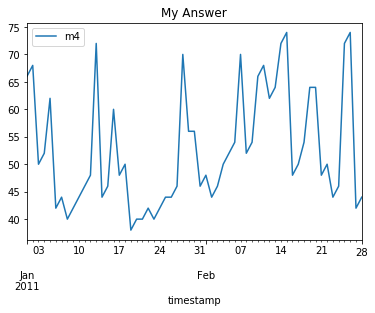

In [30]:
m4 = c3.SimpleMetric(
    id = "m4_SmartBulb",
    name = "m4",
    srcType = "SmartBulb",
    path = "bulbMeasurements",
    expression = "avg(min(normalized.data.temperature))"
)

spec4 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m4"],
    start = "2011-01-01",
    end = "2011-03-01",
    interval = "DAY"
)

result4 = c3.SmartBulb.evalMetricsWithMetadata(spec=spec4, overrideMetrics=[m4])

df = eval_metric_results_to_df(result4)
df[df['source']=='SMBLB1'].plot(x='timestamp',y='m4')
plt.title("My Answer")

<img src='http://learnc3.ai/wp-content/uploads/2020/01/SimpleMetric4.png' width="500"/>

##### Simple Metric 5

> Define a metric that returns the **average** value of **power** across time and the **average** across space on **un-normalized** data

> Evaluate the metric with **interval = "DAY"**

Answer the following:

> Did you notice how slow the evaluation is comparing to previous examples? Do you understand why? Are you expecting the result to be like this? What is your conclusion?"

Text(0.5, 1.0, 'My Answer')

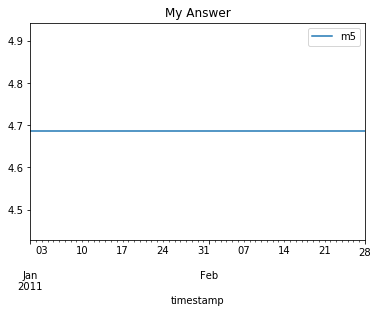

In [160]:
m5 = c3.SimpleMetric(
    id = "m5_SmartBulb",
    name = "m5",
    srcType = "SmartBulb",
    path = "bulbMeasurements",
    expression = "avg(avg(data.power))"
)

spec5 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m5"],
    start = "2011-01-01",
    end = "2011-03-01",
    interval = "DAY"
)

result5 = c3.SmartBulb.evalMetricsWithMetadata(spec=spec5, overrideMetrics=[m5])

df = eval_metric_results_to_df(result5)
df[df['source']=='SMBLB1'].plot(x='timestamp',y='m5')
plt.title("My Answer")

<img src='http://learnc3.ai/wp-content/uploads/2020/01/SimpleMetric5.png' width="500"/>

##### Simple Metric 6

> Define a metric that returns the **value** for the **gridStatusSet** event

> **Normalize** on the fly to get the **average** across time

> Evaluate the metric with **interval = "DAY"**

Hint:

> Fetch on the **PowerGridStatusSet** type to understand the data first

Text(0.5, 1.0, 'My Answer')

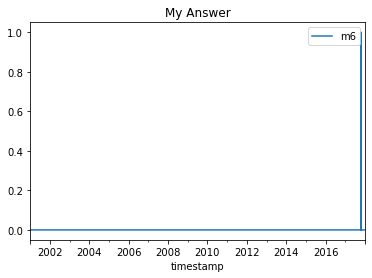

In [37]:
td6 = c3.TSDecl(
    data = "gridStatusSet",
    start = "timestamp",
    treatment = "AVG",
    value = "value"
)

m6 = c3.SimpleMetric(
    id = "m6_Building",
    name = "m6",
    srcType = "Building",
    tsDecl = td6
)

spec6 = c3.EvalMetricsSpec(
    ids = ["bld1"],
    expressions = ["m6"],
    start = "2001-01-01",
    end = "2018-01-01",
    interval = "DAY"
)

result6 = c3.Building.evalMetricsWithMetadata(spec=spec6, overrideMetrics=[m6])

df = eval_metric_results_to_df(result6)
df[df['source']=='bld1'].plot(x='timestamp',y='m6')
plt.title("My Answer")

<img src='http://learnc3.ai/wp-content/uploads/2020/05/simplemetric6.png' width="500"/>

> Note: Your answers may not be exact, but at the very least similar. 

##### Simple Metric 7

> Define a metric that returns the **value** for the **gridStatusSet** event

> **Normalize** on the fly and use `PREVIOUS` as the treatment

> Evaluate the metric with **interval = "DAY"**

Answer the following:

> Compare this result with the previous, does it make sense? Remember, when data is missing, the value will still be 0. (missing information will be 100%)

Text(0.5, 1.0, 'My Answer')

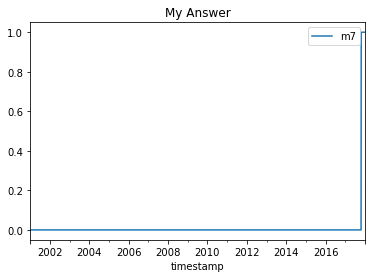

In [35]:
td7 = c3.TSDecl(
    data = "gridStatusSet",
    start = "timestamp",
    treatment = "PREVIOUS",
    value = "value"
)

m7 = c3.SimpleMetric(
    id = "m7_Building",
    name = "m7",
    srcType = "Building",
    tsDecl = td7
)

spec7 = c3.EvalMetricsSpec(
    ids = ["bld1"],
    expressions = ["m7"],
    start = "2001-01-01",
    end = "2018-01-01",
    interval = "DAY"
)

result7 = c3.Building.evalMetricsWithMetadata(spec=spec7, overrideMetrics=[m7])

df = eval_metric_results_to_df(result7)
df[df['source']=='bld1'].plot(x='timestamp',y='m7')
plt.title("My Answer")

<img src='http://learnc3.ai/wp-content/uploads/2020/05/simplemetric7.png' width="500"/>

##### Simple Metric 8

> Define a metric that returns **100** if value for the **gridStatusSet** event is greater than 0.5, otherwise return **50**

> If there is missing value, we want to impute with the **previous** value

> Evaluate the metric with **interval = "DAY"**


>> Hint: Google _ternary operator javascript_

Text(0.5, 1.0, 'My Answer')

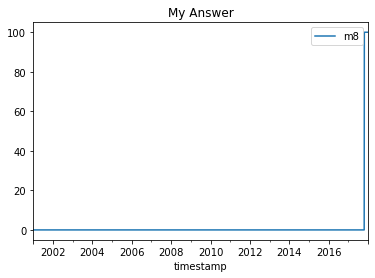

In [39]:
td8 = c3.TSDecl(
    data = "gridStatusSet",
    start = "timestamp",
    treatment = "PREVIOUS",
    value = "value > 0.5 ? 100 : 50"
)

m8 = c3.SimpleMetric(
    id = "m8_Building",
    name = "m8",
    srcType = "Building",
    tsDecl = td8
)

spec8 = c3.EvalMetricsSpec(
    ids = ["bld1"],
    expressions = ["m8"],
    start = "2001-01-01",
    end = "2018-01-01",
    interval = "DAY"
)

result8 = c3.Building.evalMetricsWithMetadata(spec=spec8, overrideMetrics=[m8])

df = eval_metric_results_to_df(result8)
df[df['source']=='bld1'].plot(x='timestamp',y='m8')
plt.title("My Answer")

<img src='http://learnc3.ai/wp-content/uploads/2020/05/simplemetric8.png' width="500"/>

##### Simple Metric 9

> Define a metric that returns the **value** for the **gridStatusSet** event

> **Normalize** on the fly to get the average

> If data is missing, impute with the number **15**

> Evaluate the metric with **interval = "DAY"**


>> Hint: Run `c3ShowType(ExpressionEngineFunction)` and checkout `fillMissing()`

Text(0.5, 1.0, 'My Answer')

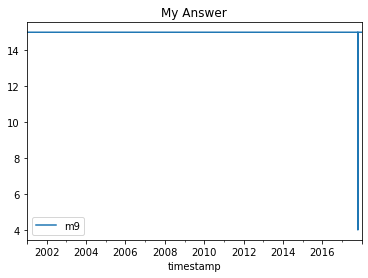

In [172]:
td9 = c3.TSDecl(
    data = "gridStatusSet",
    start = "timestamp",
    treatment = "AVG",
    value = "value",
    transform = "fillMissing(this, 15)"
)

m9 = c3.SimpleMetric(
    id = "m9_Building",
    name = "m9",
    srcType = "Building",
    tsDecl = td9
)

spec9 = c3.EvalMetricsSpec(
    ids = ["bld1"],
    expressions = ["m9"],
    start = "2001-01-01",
    end = "2018-01-01",
    interval = "DAY"
)

result9 = c3.Building.evalMetricsWithMetadata(spec=spec9, overrideMetrics=[m9])

df = eval_metric_results_to_df(result9)
df[df['source']=='bld1'].plot(x='timestamp',y='m9')
plt.title("My Answer")

<img src='http://learnc3.ai/wp-content/uploads/2020/05/simplemetric9.png' width="500"/>

##### Simple Metric 10

> Define a metric that returns the **value** for the **gridStatusSet** event

> If data is missing, impute with the number **15**

> Also use **'PREVIOUS'** as treatment

> Evaluate the metric with **interval = "DAY"**

Answer the following:
> Do you know which missing data are imputed because of the `PREVIOUS` treatment and which are imputed because of the `fillMissing()`?

Text(0.5, 1.0, 'Correct Answer')

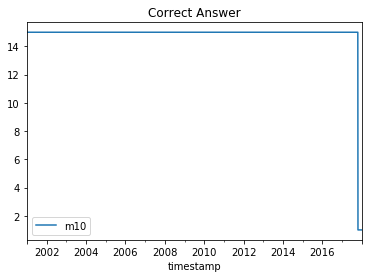

In [173]:
td10 = c3.TSDecl(
    data = "gridStatusSet",
    start = "timestamp",
    treatment = "PREVIOUS",
    value = "value",
    transform = "fillMissing(this, 15)"
)

m10 = c3.SimpleMetric(
    id = "m10_Building",
    name = "m10",
    srcType = "Building",
    tsDecl = td10
)

spec10 = c3.EvalMetricsSpec(
    ids = ["bld1"],
    expressions = ["m10"],
    start = "2001-01-01",
    end = "2018-01-01",
    interval = "DAY"
)

result10 = c3.Building.evalMetricsWithMetadata(spec=spec10, overrideMetrics=[m10])

df = eval_metric_results_to_df(result10)
df[df['source']=='bld1'].plot(x='timestamp',y='m10')
plt.title("Correct Answer")

<img src='http://learnc3.ai/wp-content/uploads/2020/05/simplemetric10.png' width="500"/>

##### Simple Metric 11

> Define a metric that returns **1** if the SmartBulb is an **LED** SmartBulb



>> Hint: Fetch on `SmartBulb` to see which field contains the **LED** information.

Text(0.5, 1.0, 'My Answer')

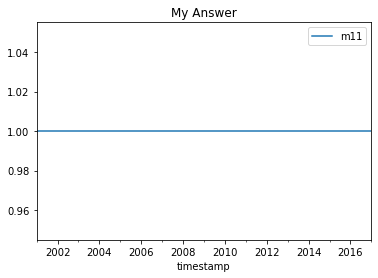

In [51]:
m11 = c3.SimpleMetric(
    id = "m11_SmartBulb",
    name = "m11",
    srcType = "SmartBulb",
    expression = "bulbType == 'LED' ? 1 : 0"
)

spec11 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m11"],
    start = "2001-01-01",
    end = "2018-01-01",
    interval = "YEAR"
)

result11 = c3.SmartBulb.evalMetricsWithMetadata(spec=spec11, overrideMetrics=[m11])

df = eval_metric_results_to_df(result11)
df[df['source']=='SMBLB1'].plot(x='timestamp',y='m11')
plt.title("My Answer")

<img src='http://learnc3.ai/wp-content/uploads/2020/01/SimpleMetric11.png' width="500"/>

##### Simple Metric 12

> Define a metric that returns **1** if the **lowercase of the first character of manufacturer name is 'g'**, and **0 otherwise**

>> Hint: `c3ShowType(ExpressionEngineFunction)`, checkout `startsWith()` and `lowerCase()`

Text(0.5, 1.0, 'My Answer')

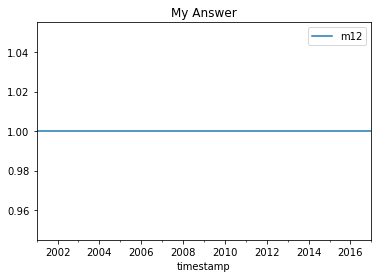

In [85]:
m12 = c3.SimpleMetric(
    id = "m12_SmartBulb",
    name = "m12",
    srcType = "SmartBulb",
    expression = "startsWith(lowerCase(manufacturer), 'g') ? 1 : 0"
)

spec12 = c3.EvalMetricsSpec(
    ids = ["SMBLB10"],
    expressions = ["m12"],
    start = "2001-01-01",
    end = "2018-01-01",
    interval = "YEAR"
)

result12 = c3.SmartBulb.evalMetricsWithMetadata(spec=spec12, overrideMetrics=[m12])

df = eval_metric_results_to_df(result12)
df[df['source']=='SMBLB10'].plot(x='timestamp',y='m12')
plt.title("My Answer")

<img src='http://learnc3.ai/wp-content/uploads/2020/01/SimpleMetric12.png' width="500"/>

##### Simple Metric 13

> In the course, you also created a `SmartBulbEvent` type. This type contains data that was created by our analytics. However, we also created a `CanonicalSmartBulbEvent` type and a `TransformCanonicalSmartBulbEventToSmartBulbEvent` type that we are now going to use in order to load historical event data into the platform.

* Observe the `SmartBulbEvent` data using your C3 Console or in a grid in this Notebook.
* Finally, use the cells below to create a simple metric that indicates if there was an Outage Event for a SmartBulb. Evaluate the metric with **"interval == 'HOUR'"**.


>> Hint: Remember, you can use `c3ShowType(SmartBulb)` to navigate through the data model.

c3.SimpleMetric(
 name='m13',
 id='m13_SmartBulb',
 srcType=c3.TypeRef(typeName='SmartBulb'),
 tsDecl=c3.TSDecl(
          data='bulbEvents',
          treatment='MAX',
          start='start',
          end='end',
          value="eventType == 'Outage' ? 1: 0"))


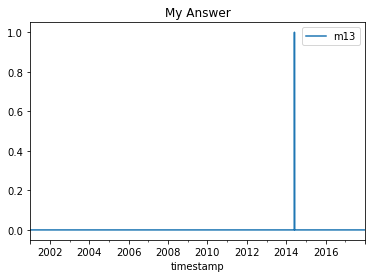

In [91]:
td13 = c3.TSDecl(data = "bulbEvents",
                treatment = "MAX",
                start = "start",
                end = "end",
                value = "eventType == 'Outage' ? 1: 0")

m13 = c3.SimpleMetric(id = "m13_SmartBulb",
                      name = "m13",
                      tsDecl = td13,
                      srcType = "SmartBulb")

spec13 = c3.EvalMetricsSpec(
    ids = ["SMBLB38"],
    expressions = ["m13"],
    start = "2001-01-01",
    end = "2018-01-01",
    interval = "HOUR"
)

result13 = c3.SmartBulb.evalMetricsWithMetadata(spec=spec13, overrideMetrics=[m13])

df = eval_metric_results_to_df(result13)
df[df['source']=='SMBLB38'].plot(x='timestamp',y='m13')
plt.title("My Answer")
print(m13)

<img src='http://learnc3.ai/wp-content/uploads/2020/01/SimpleMetric13.png' width="500"/>

Persist this metric in the code for your application, being careful to put it in the right folder. We will use this metric in the next parts of the project. Then, provision your code to your environment and make sure you obtain the same result as above when you run your metric in the JS console with the same spec.

> Hint 1: you can print out the variable `m13` and directly copy and paste the contents to a json file in the seed directory. 

>> Hint 2: Ensure that when you create your json file that it is in the seed folder subdirectory named `SimpleMetric`. The filename is not important for the purposes of the platform, but by convention and for better organization and file management for you, we suggest naming the file **MetricName_SourceType.json**.

In [92]:
print(m13)

c3.SimpleMetric(
 name='m13',
 id='m13_SmartBulb',
 srcType=c3.TypeRef(typeName='SmartBulb'),
 tsDecl=c3.TSDecl(
          data='bulbEvents',
          treatment='MAX',
          start='start',
          end='end',
          value="eventType == 'Outage' ? 1: 0"))


### B. Writing Compound Metrics <a class="anchor" id="2B">


In this section, you will be given the skeleton to write, evaluate, and plot compound metrics. **Your task** is to complete the parts that are left as **"???"** in order for your output to match the plot of the correct answer we displayed for you.

##### Compound Metric 1

> Define a compound metric that returns the `AverageTemperature`,  no other operations.

> Evaluate the metric using **"interval == 'HOUR'"**.

> Does it make sense?

Text(0.5, 1.0, 'My Answer')

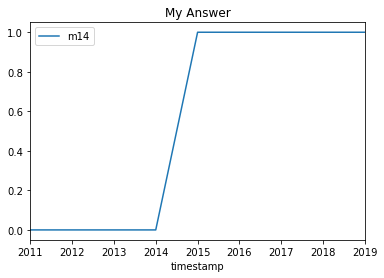

In [159]:
m14 = c3.CompoundMetric(
    id = "m14",
    name = "m14_SmartBulb",
    expression = "HasEverFailed"
)

spec14 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m14"],
    start = "2011-01-01",
    end = "2019-03-01",
    interval = "YEAR"
)

result14 = c3.SmartBulb.evalMetricsWithMetadata(spec=spec14, overrideMetrics=[m14])

df = eval_metric_results_to_df(result14)
df[df['source']=='SMBLB1'].plot(x='timestamp',y='m14')
plt.title("My Answer")

Text(0.5, 1.0, 'My Answer')

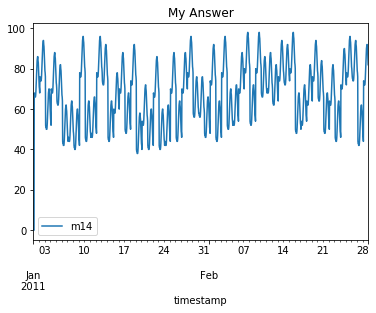

In [93]:
m14 = c3.CompoundMetric(
    id = "m14",
    name = "m14_SmartBulb",
    expression = "AverageTemperature"
)

spec14 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m14"],
    start = "2011-01-01",
    end = "2011-03-01",
    interval = "HOUR"
)

result14 = c3.SmartBulb.evalMetricsWithMetadata(spec=spec14, overrideMetrics=[m14])

df = eval_metric_results_to_df(result14)
df[df['source']=='SMBLB1'].plot(x='timestamp',y='m14')
plt.title("My Answer")

<img src='http://learnc3.ai/wp-content/uploads/2020/01/CompoundMetric1.png' width="500"/>

##### Compound Metric 2

> Define a compound metric that returns a smoothed version of `AverageTemperature` - meaning a sliding window of average from values of the simple metric results. Start the window as 20 values before the current one. Set the window size to be 20

> Evaluate the metric with **interval: 'HOUR'** and again with **interval: 'DAY'**.

> Hint: `c3ShowType(ExpressionEngineFunction)` to understand `window()`

Answer the following:

> In the figure, do you understand the differences of the two lines due to evaluation interval?

(Note that your result will come out in 2 separate graphs)

Text(0.5, 1.0, 'My Answer')

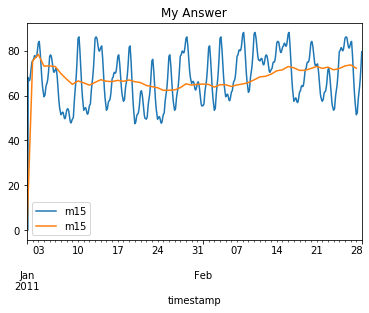

In [95]:
m15 = c3.CompoundMetric(
    id = "m15",
    name = "m15",
    expression = "window('AVG', AverageTemperature, -20, 20)"
)

spec15 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m15"],
    start = "2011-01-01",
    end = "2011-03-01",
    interval = "HOUR"
)

result15 = c3.SmartBulb.evalMetricsWithMetadata(spec=spec15, overrideMetrics=[m15])

_, ax = plt.subplots(1)
df = eval_metric_results_to_df(result15)
df[df['source']=='SMBLB1'].plot(x='timestamp',y='m15', ax=ax)

spec15 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m15"],
    start = "2011-01-01",
    end = "2011-03-01",
    interval = "DAY"
)

result15 = c3.SmartBulb.evalMetricsWithMetadata(spec=spec15, overrideMetrics=[m15])

df = eval_metric_results_to_df(result15)
df[df['source']=='SMBLB1'].plot(x='timestamp',y='m15', ax=ax)
ax.set_title("My Answer")

<img src='http://learnc3.ai/wp-content/uploads/2020/01/CompoundMetric2.png' width="500"/>

##### Compound Metric 3 


> Define a compound metric that returns a smoothed version of `AverageTemperature` - meaning a sliding window of average from the 20 **hours** before to the current one

> Evaluate the metric with **"interval == 'HOUR'"**

Answer the following:

> Will your metric achieve the idea of "average of 20 hours" even when the eval spec interval is `DAY`?

Text(0.5, 1.0, 'My Answer')

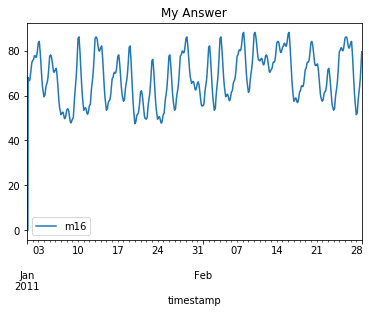

In [99]:
m16 = c3.CompoundMetric(
    id = "m16",
    name = "m16",
    expression = "window('AVG', AverageTemperature, -20, 20)"
)

spec16 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m16"],
    start = "2011-01-01",
    end = "2011-03-01",
    interval = "HOUR"
)

result16 = c3.SmartBulb.evalMetricsWithMetadata(spec=spec16, overrideMetrics=[m16])

df = eval_metric_results_to_df(result16)
df[df['source']=='SMBLB1'].plot(x='timestamp',y='m16')
plt.title("My Answer")

<img src='http://learnc3.ai/wp-content/uploads/2020/01/CompoundMetric3.png' width="500"/>

#### Compound Metric 4

> Define a compound metric that returns a smoothed version of `AverageTemperature` - meaning a sliding window of average from 2 **days** before to the current one

> Evaluate the metric with **"inteval == 'HOUR'"**

> Will your metric work when **"interval == 'DAY'"** ?

>> Hint: Remember `eval()`?

Answer the following:

> Do you understand the difference between the two 'AVG's?

> We already forced `eval()`. Why are the two lines still differ slightly?

(Note that your graph will come out as 2 separate graphs)

Text(0.5, 1.0, 'My Answer')

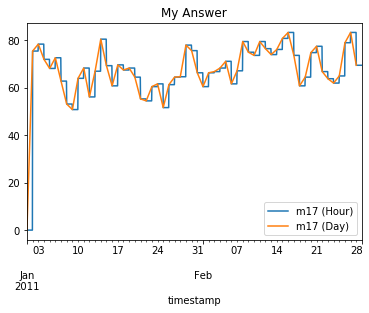

In [101]:
m17 = c3.CompoundMetric(
    id = "m17",
    name = "m17",
    expression = "eval('AVG', 'DAY', window('AVG', AverageTemperature, -2, 2))"
)

spec17 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m17"],
    start = "2011-01-01",
    end = "2011-03-01",
    interval = "HOUR"
)

result17 = c3.SmartBulb.evalMetricsWithMetadata(spec=spec17, overrideMetrics=[m17])

_, ax = plt.subplots(1)
df = eval_metric_results_to_df(result17)
df[df['source']=='SMBLB1'].plot(x='timestamp',y='m17', ax=ax, label='m17 (Hour)')

spec17 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m17"],
    start = "2011-01-01",
    end = "2011-03-01",
    interval = "DAY"
)

result17 = c3.SmartBulb.evalMetricsWithMetadata(spec=spec17, overrideMetrics=[m17])
df = eval_metric_results_to_df(result17)
df[df['source']=='SMBLB1'].plot(x='timestamp',y='m17',ax=ax, label='m17 (Day)')
ax.set_title("My Answer")

<img src='http://learnc3.ai/wp-content/uploads/2020/01/CompoundMetric4.png' width="500"/>

##### Compound Metric 5

> Define a compound metric that returns the **sum** of temperature since the beginning of time

> Evaluate the metric with **"interval == 'DAY'"**

> Pay attention to the values. The first sum shouldn't start at 0

Text(0.5, 1.0, 'My Answer')

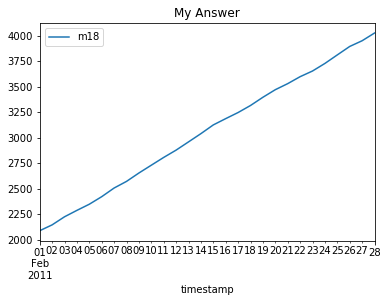

In [118]:
m18 = c3.CompoundMetric(
    id = "m18",
    name = "m18",
    expression = "eval('SUM', 'DAY', rolling('SUM', AverageTemperature), dateTime(1990-01-01))"
    # eval('AVG', 'DAY', rolling('SUM', AveragePower), dateTime(1990-01-01))
)

spec18 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m18"],
    start = "2011-02-01",
    end = "2011-03-01",
    interval = "DAY"
)

result18 = c3.SmartBulb.evalMetricsWithMetadata(spec=spec18, overrideMetrics=[m18])

df = eval_metric_results_to_df(result18)
df[df['source']=='SMBLB1'].plot(x='timestamp',y='m18')
plt.title("My Answer")

<img src='http://learnc3.ai/wp-content/uploads/2020/01/CompoundMetric5.png' width="500"/>

##### Compound Metric 6

> Define a compound metric that returns **1** if the **average temperature** is **greater or equal than 80**, and 0 otherwise

> Evaluate the metric with **"interval == 'DAY'"**

Text(0.5, 1.0, 'My Answer')

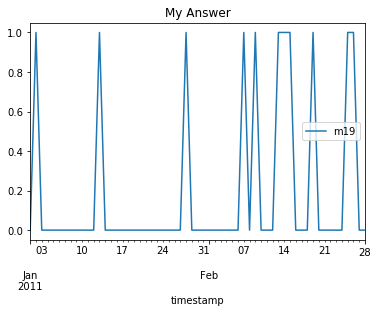

In [108]:
m19 = c3.CompoundMetric(
    id = "m19",
    name = "m19",
    expression = "eval('MAX', 'DAY', (AverageTemperature >= 80?1:0))"
)

spec19 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m19"],
    start = "2011-01-01",
    end = "2011-03-01",
    interval = "DAY"
)

result19 = c3.SmartBulb.evalMetricsWithMetadata(spec=spec19, overrideMetrics=[m19])

df = eval_metric_results_to_df(result19)
df[df['source']=='SMBLB1'].plot(x='timestamp',y='m19')
plt.title("My Answer")

<img src='http://learnc3.ai/wp-content/uploads/2020/01/CompoundMetric6.png' width="500"/>

##### Compound Metric 7

> Use the compound metric 6 created just above to define a compound metric that returns the **sum** of **temperature since the beginning of time**, and **resets** the sum if a temperature point is **greater or equal than 80**

> Evaluate the metric with **"interval == 'DAY'"**

Text(0.5, 1.0, 'My Answer')

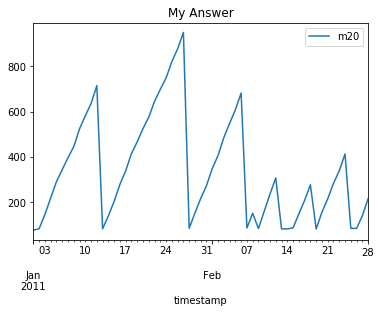

In [175]:
m20 = c3.CompoundMetric(
    id = "m20",
    name = "m20",
    expression = "eval('SUM', 'DAY', rolling('SUM', AverageTemperature, (m19 == 1)))"
)

spec20 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m20"],
    start = "2011-01-01",
    end = "2011-03-01",
    interval = "DAY"
)

result20 = c3.SmartBulb.evalMetricsWithMetadata(spec=spec20, overrideMetrics=[m19, m20])

df = eval_metric_results_to_df(result20)
df[df['source']=='SMBLB1'].plot(x='timestamp',y='m20')
plt.title("My Answer")

<img src='http://learnc3.ai/wp-content/uploads/2020/01/CompoundMetric7.png' width="500"/>

##### Compound Metric 8

> Use the same compound metric 6 to define a compound metric that returns the **number of days** since a **temperature point** was **greater or equal than 80**

> Evaluate the metric with **"interval == 'DAY'"**

>> Hint: `c3ShowType(ExpressionEngineFunction)` and look for the `identity()` function.

Text(0.5, 1.0, 'My Answer')

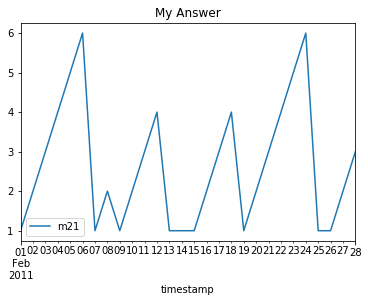

In [176]:
m21 = c3.CompoundMetric(
    id = "m21",
    name = "m21",
    expression = "eval('SUM', 'DAY', rolling('SUM', identity(1), (m19 == 1)))"
)

spec21 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m21"],
    start = "2011-02-01",
    end = "2011-03-01",
    interval = "DAY"
)

result21 = c3.SmartBulb.evalMetricsWithMetadata(spec=spec21, overrideMetrics=[m19, m21])

df = eval_metric_results_to_df(result21)
df[df['source']=='SMBLB1'].plot(x='timestamp',y='m21')
plt.title("My Answer")

<img src='http://learnc3.ai/wp-content/uploads/2020/01/CompoundMetric8.png' width="500"/>

##### Compound Metric 9

> Define a compound metric that returns **1** if the **average power** is **<=4**, and returns 0 otherwise

> Use **this compound metric** as well as **compound metric 6** to define a compound metric that returns **1** if the **average tempeature** is **>=80** and the **average power** is **<=4**, and returns (-1) **otherwise**

> Evaluate the metric with **"interval == 'DAY'"**

Text(0.5, 1.0, 'My Answer')

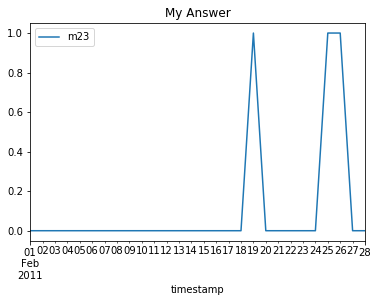

In [143]:
# Compound metric that returns 1 if average power is <= 4, otherwise 0
m22 = c3.CompoundMetric(
    id = "m22",
    name = "m22",
    expression = "AveragePower <= 4 ? 1 : 0"
)

# Compound metric that returns 1 if average temp is >=80 and average power is <=4, otherwise -1
m23 = c3.CompoundMetric(
    id = "m23",
    name = "m23",
    expression = "m22 && m19 ? 1 : 0"
)

spec23 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m23"],
    start = "2011-02-01",
    end = "2011-03-01",
    interval = "DAY"
)

result23 = c3.SmartBulb.evalMetricsWithMetadata(spec=spec23, overrideMetrics=[m19, m22, m23])

df = eval_metric_results_to_df(result23)
df[df['source']=='SMBLB1'].plot(x='timestamp',y='m23')
plt.title("My Answer")

<img src='http://learnc3.ai/wp-content/uploads/2020/01/CompoundMetric9.png' width="500"/>

##### Compound Metric 10

> Define a compound metric called `StandardDeviationWattsPreviousWeek` that returns the **standard deviation** of the `AveragePower` simple metric over the **past week.**

> Evaluate the metric using **"interval == 'DAY'"**.


{'type': 'CompoundMetric',
 'name': 'StandardDeviationWattsPreviousWeek',
 'expression': "eval('STDDEV', 'DAY', window('STDDEV', AveragePower, -7, 7))",
 'id': 'StandardDeviationWattsPreviousWeek'}

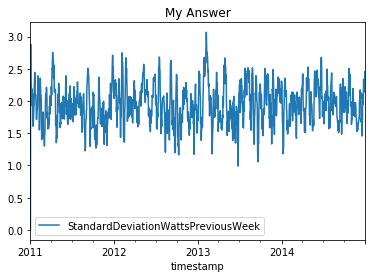

In [151]:
m24 = c3.CompoundMetric(id = "StandardDeviationWattsPreviousWeek",
                        name = "StandardDeviationWattsPreviousWeek",
                        expression = "eval('STDDEV', 'DAY', window('STDDEV', AveragePower, -7, 7))")

spec24 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["StandardDeviationWattsPreviousWeek"],
    start = "2011-01-01",
    end = "2015-01-01",
    interval = "DAY"
)

result24 = c3.SmartBulb.evalMetricsWithMetadata(spec=spec24, overrideMetrics=[m24])

df = eval_metric_results_to_df(result24)
df[df['source']=='SMBLB1'].plot(x='timestamp',y='StandardDeviationWattsPreviousWeek')
plt.title("My Answer")
m24.toJson()

<img src='http://learnc3.ai/wp-content/uploads/2020/01/CompoundMetric10.png' width="500"/>

Persist this metric in the code for your application, being careful to put it in the right folder. We will use this metric in the next parts of the project. Then, povision and then run **result24** below with `evalMetrics` instead of `evalMetricsWithMetadata`. Make sure you obtain the same result as above when you run your metric in the JS console with the same spec.
  
> Hint 1: You can print out `m24.toJson()` and directly copy and paste the contents to a json file in the seed directory. 
  
> Hint 2: Ensure that when you create your json file that it is in the seed folder subdirectory named `'CompoundMetric'`. The filename is not important for the purposes of the platform, but by convention and for better organization and file management for you, we suggest naming the file **MetricName.json**.


After provisioning, confirm that the metrics was added by listing all the metrics on SmartBulb using `c3Grid(SmartBulb.listMetrics())` in the console.

After the metric has been provisioned to your environment, what changes in how you evaluate the metric? Please see the comments in the code block below.

In [ ]:
# DON'T NEED THIS ANYMORE AFTER PROVISIONING 
#m24 = c3.CompoundMetric(id = "StandardDeviationWattsPreviousWeek",
#                         name = "StandardDeviationWattsPreviousWeek",
#                         expression = "eval('AVG', 'DAY', window('STDDEV', AveragePower, -7, 7))")

# this part stays the same. The system will find the metric by name 
spec24 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["StandardDeviationWattsPreviousWeek"],
    start = "2011-01-01",
    end = "2015-01-01",
    interval = "DAY"
)
print(spec24.shape)
# SWITCH FROM CALLING "evalMetricsWithMetaData" TO "evalMetrics" and remove 2nd arguemnt
#result24 = c3.SmartBulb.evalMetricsWithMetaData(spec24, [m24])
#result24 = c3.SmartBulb.evalMetrics(spec24)

## Optional: Implement ActionDecl

**ActionDecl**

`ActionDecl` is used in place of `TSDecl` when you need to provide a custom function.

<img src='http://learnc3.ai/wp-content/uploads/2020/01/actionDecl1.png' width="500"/>

> Note: `ActionDecl` execution is significantly less efficient than the metric engine, use it in last resort only.

In the example below, we have created a custom function `isSunUp()`, and applied the function to the `ActionMetricDecl` as 'action'.  
This `ActionMetricDecl` object is then set to the value of `actionDecl` parameter in the SimpleMetric function.

> **Step 1:** Add the below javascript function in your code and provision. 

> **Step 2:** Once the function is provisioned, run the code `ActionMetricDecl` simplemetric and evaluate on the fly
  

##### Step 1 - Declare and implement the logic behind your metric
You can see the function `isSunUp()` defined in **SmartBulb.js** and declared in **SmartBulb.c3typ**.

- Start by declaring the logic in the source type file (here: **SmartBulb.c3typ**). Notice that the first 3 arguments of `isSunUp` are imposed by the metric engine, any argument you might want will come after those.

<img src='http://learnc3.ai/wp-content/uploads/2020/01/actionDecl0.png' width="500"/>

* Implement the logic in `JavaScript`:

<img src='http://learnc3.ai/wp-content/uploads/2020/01/actionDecl2.png' width="500"/>

##### Step 2 - ActionDecl metric declaration
```js
sun = SimpleMetric.make({
    "id":"sun_SmartBulb",
    "name":"sun",
    "srcType":"SmartBulb",
    "actionDecl":{
        "action":'isSunUp', 
        "include":'latitude'
    }
}
)

spec = EvalMetricsSpec.make({
    "ids" : ["SMBLB38"],
    "expressions" : ["sun"],
    "start" : "2017-01-01",
    "end" : "2017-01-02",
    "interval" : "HOUR"
})

result = SmartBulb.evalMetricsWithMetadata(spec=spec,overrideMetrics=[sun])
c3Viz(result)```

### Conclusion

Congratulations! You have completed the metrics section that covers most of the different functions we use as Data Scientists on the C3 AI Suite. With these skills, you will be able to create the features you will use for your Machine Learning models in the next section.

## Make sure to CLOSE AND HALT  (from bottom of the File menu at the top) this notebook when you leave.

## Appendix - Kernel Installation Instructions <a class="anchor" id="apdx">

If the `py-pythonEnv` kernel is not available, perform the following:
1. Select the 'Kernel' tab at the top of this notebook, then select 'Manage Kernels';
2. Scroll to find `py-pythonEnv`, and click the 'Install' button;
> Note: This installation will "fail", but don't worry, exit the Manage Kernels UI and return to the main notebook.
3. Navigate to the 'File' tab located at the top of the notebook, and select 'Close and Hault'. This will close the notebook. Re-open it.
4. You should notice, in the upper-right corner, the kernel is now set correctly to `py-pythonEnv`. If it is not, navigate to the Kernel tab, then select 'Change Kernel' and select the appropriate option.